### Installation
![dark](https://user-images.githubusercontent.com/12748752/143572000-059f26cd-599d-4daf-a5ed-aa0dc1986965.png)


In [ ]:
# $ cd $ML_PATH # Your ML working directory (e.g., $HOME/ml)
# $ source env/bin/activate # on Linux or MacOSX
# $ .\env\Scripts\activate # on Windows

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.0.0'

In [5]:
keras.__version__

'2.2.4-tf'

## Image Classification
![dark](https://user-images.githubusercontent.com/12748752/143572000-059f26cd-599d-4daf-a5ed-aa0dc1986965.png)
* Let’s load Fashion MNIST:
* Train-Test split

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


#### Difference between Sklearn MNIST loading and Kearas loading
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)


In [7]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


#### Creating validation set
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)


In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the Model Using the Sequential API
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)


In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#### Explanation
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)

* The first line creates a Sequential model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, connected
sequentially. This is called the sequential API.
* Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is simply to convert each input image into a 1D array: if it receives input data
X, it computes `X.reshape(-1, 1)`. This layer does not have any parameters, it is
just there to do some simple preprocessing. Since it is the first layer in the model,
you should specify the input_shape: this does not include the batch size, only the
shape of the instances. Alternatively, you could add a `keras.layers.InputLayer`
as the first layer, setting `shape=[28,28]`.
*  Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation
function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes  
<img src="https://latex.codecogs.com/svg.image?h_{\mathrm{W,b}}(\mathrm{X})=\phi&space;(XW&space;&plus;&space;b)" title="h_{\mathrm{W,b}}(\mathrm{X})=\phi (XW + b)" />
* Next we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).

> #### Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:


In [12]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* the first hidden layer has `784 × 300` connection weights, plus `300 bias` terms, which adds up to `235,500` parameters!
* the second hidden layer has `300 x 100` connection weights, plus `100 bias` terms, which adds up to `30100` parameters!


In [26]:
model.layers

In [27]:
model.layers[1].name

'dense_3'

In [30]:
weights, biases = model.layers[1].get_weights()

In [31]:
weights

array([[-3.57105024e-02, -2.23791227e-02,  4.92519885e-03, ...,
         2.13734582e-02,  2.09286809e-05, -1.16274282e-02],
       [ 4.19773236e-02,  5.35594672e-02,  1.50851235e-02, ...,
         2.46345252e-02, -7.42573440e-02, -9.44047421e-03],
       [-7.22777992e-02,  6.64865077e-02, -1.05211511e-02, ...,
        -8.71495903e-03,  2.01758668e-02, -7.06721321e-02],
       ...,
       [-3.77798192e-02, -3.18263210e-02,  5.15776575e-02, ...,
        -2.62437016e-03,  4.60891426e-03,  3.32287624e-02],
       [-3.26943956e-02,  1.81170702e-02,  6.89996183e-02, ...,
        -3.43598723e-02,  2.74037793e-02,  1.42297521e-02],
       [-3.69021669e-02, -4.64640595e-02, -5.04557155e-02, ...,
         2.36101151e-02, -6.52072281e-02,  5.09284139e-02]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

> #### The shape of the weight matrix depends on the number of inputs.
* This is why it is recommended to specify the input_shape when creating the first layer in a `Sequential` model.
*  However, if you do not specify the input shape, it’s okay: Keras will simply wait until it knows the input shape before it actually builds the model. This will
happen either when you feed it actual data (e.g., during training),
or when you call its build() method. Until the model is really
built, the layers will not have any weights, and you will not be able
to do certain things (such as print the model summary or save the
model), so if you know the input shape when creating the model, it
is best to specify it.


#### Compiling the Model
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)


In [35]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

#### Explanation
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)
* Loss function- **`sparse_categorical_crossen tropy`**  because 
    * sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 
    * We would need to use the `categorical_crossentropy` if we had one target probability per class for each instance (such as one-hot vectors).
* Activation function-  **`softmax`**  
    * If we were doing binary classification (with one or more binary labels), then we would use the **`sigmoid`** (i.e., logistic) activation function in the output layer and we would use the **`binary_crossentropy`** loss.
    
* Optimizer- **`sgd`**  (**Stochastic Gradient Descent**)
    * Keras will perform the backpropagation algorithm described earlier (i.e., **reverse-mode autodiff + Gradient Descent**).
    
* Finally, since this is a classifier, it’s useful to measure its **`accuracy`** during training and evaluation.

#### Training the Model
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)
* `fit()` method using the batch_size argument, which defaults to 32

In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.7242 - accuracy: 0.7599 - val_loss: 0.5172 - val_accuracy: 0.8270
Epoch 2/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4928 - accuracy: 0.8277 - val_loss: 0.4680 - val_accuracy: 0.8386
Epoch 3/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4458 - accuracy: 0.8436 - val_loss: 0.4140 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4181 - accuracy: 0.8524 - val_loss: 0.4312 - val_accuracy: 0.8510
Epoch 5/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3956 - accuracy: 0.8615 - val_loss: 0.3879 - val_accuracy: 0.8660
Epoch 6/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3792 - accuracy: 0.8659 - val_loss: 0.3704 - val_accuracy: 0.8698
Epoch 7/30
55000/55000 [==============================] 

> #### The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a _dictionary_ (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). 

#### Plot the result
![loght](https://user-images.githubusercontent.com/12748752/143572007-3e36b5ab-287f-4659-bf18-efc819f97305.png)
* If you create a Pandas DataFrame using this dictionary and call its `plot()` method you will get a curve.

In [40]:
from matplotlib import pyplot as plt

> #### Need to add the above otherwise code will throw an erroe on `plot()`

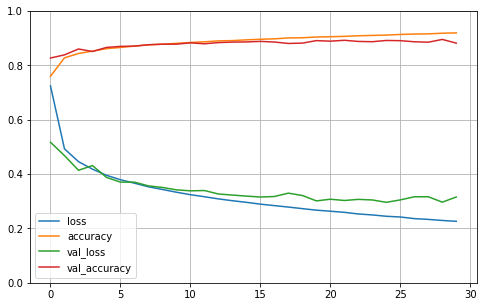

In [41]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Model Evalution
![dark](https://user-images.githubusercontent.com/12748752/143572000-059f26cd-599d-4daf-a5ed-aa0dc1986965.png)
* Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the _generalization error_ before you deploy the model to production. 
* You can easily do this using the `evaluate()` method (it also supports several other arguments such as- `batch_size` or `sample_weight` etc.

In [52]:
model.evaluate(X_test, y_test)

10000/1 [==================================================================] - 0s 44us/sample - loss: 32.7245 - accuracy: 0.8450


[61.505231185778975, 0.845]

### Using the Model to Make Predictions
![dark](https://user-images.githubusercontent.com/12748752/143572000-059f26cd-599d-4daf-a5ed-aa0dc1986965.png)
* Next, we can use the model’s predict() method to make predictions on new instances.
* Since we don’t have actual new instances, we will just use the first 3 instances of the test set:

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
import numpy as np
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


> #### And the classifier actually classified all three images correctly:

In [49]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)